In [1]:
from sklearn.datasets import fetch_openml 
import sklearn
import matplotlib.pyplot as plt
from sklearn import neighbors
import numpy as np
from sklearn import model_selection
import time
sklearn.__version__

'1.0.1'

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
#print(mnist) #Affiche l'ensemble des éléments du jeu de données
#print (mnist.data) #Affiche pour chaque image la valeur de chaque pixel
#print (mnist.target) #Affiche les labels associés à cahque images, ainsi que quelques infos liées aux labels
#len(mnist.data) #Affiche le nombre d'images dans le dataset = le nombre de lignes du dataframe
#print (mnist.data.shape) #affiche le nombre d'images du dataset et le nombre de pixels par image
#print (mnist.target.shape)
#mnist.data.values[0] #Affiche la valeur des pixls de la première image du dataset
#mnist.data.values[0][1] #Affiche la valeur du deuxième pixel de la première image du dataset
#mnist.data.values[:,1] #Affiche le premier pixel de toutes les images du dataset
mnist.data[:100] #Affiche les 100 premieres images du dataset

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


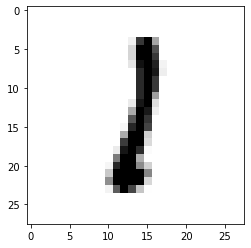

1


In [4]:
nb = 152
images = mnist.data.values.reshape((-1,28,28))
plt.imshow(images[nb],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()
print(mnist.target[nb])

In [5]:
#Création du jeu de données pour l'entrainement et le test
indexes = np.random.randint(70000, size=5000)
data = mnist.data.values[indexes]
target = mnist.target[indexes]
xtrain,  xtest,  ytrain,  ytest = model_selection.train_test_split(data, target, train_size = 0.8)

#Entrainement du model
n_neighbors = 10
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=10)

In [6]:
#Test de prédiction sur une image
num_image = 4
classe = ytrain.values[num_image]
classe_prédite = clf.predict([xtrain[num_image]])[0]
print("Classe de l'image {}: {}.\nClasse prédite: {}.".format(num_image,classe,classe_prédite))


Classe de l'image 4: 9.
Classe prédite: 9.


In [7]:
print("Score sur l'échantillon de test:", clf.score(xtest,ytest))
print("Score sur les données d'apprentissage:", clf.score(xtrain,ytrain))
#On a une erreur plus faible sur les données d'apprentissage que sur les données de test, ce qui est normal puisque le modèle cherche à imiter kl==les données d'appprentissage.
#On a par contre pas un score parfait sur le jeu d'apprentissage

Score sur l'échantillon de test: 0.931
Score sur les données d'apprentissage: 0.92925


Score pour 2 voisins: 0.9164
Score pour 3 voisins: 0.9299999999999999
Score pour 4 voisins: 0.9274000000000001
Score pour 5 voisins: 0.9277999999999998
Score pour 6 voisins: 0.9221999999999999
Score pour 7 voisins: 0.9238000000000002
Score pour 8 voisins: 0.9216000000000001
Score pour 9 voisins: 0.9190000000000002
Score pour 10 voisins: 0.9186
Score pour 11 voisins: 0.9194000000000001
Score pour 12 voisins: 0.9141999999999999
Score pour 13 voisins: 0.9164
Score pour 14 voisins: 0.9129999999999999
Score pour 15 voisins: 0.9112


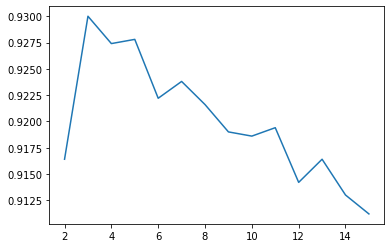

In [4]:
#Création du jeu de données pour l'entrainement et le test
indexes = np.random.randint(70000, size=5000)
data = mnist.data.values[indexes]
target = mnist.target[indexes]
#xtrain,  xtest,  ytrain,  ytest = model_selection.train_test_split(data, target, train_size = 0.8)
n_splits = 10
kf = model_selection.KFold(n_splits=n_splits, shuffle=True) 

scores = []

for k in range(2,16):
    score = 0
    for label_train, label_test in kf.split(data,target):
        clf = neighbors.KNeighborsClassifier (k)
        clf.fit(data[label_train],target.values[label_train])
        score+=clf.score(data[label_test],target.values[label_test])
    score/=n_splits
    scores.append(score)
    print("Score pour {} voisins: {}".format(k,scores[-1]) )
    

plt.plot(list(range(2,16)),scores)
plt.show()
#Le k optimal semble être 3

In [6]:
indexes = np.random.randint(70000, size=5000)
data = mnist.data.values[indexes]
target = mnist.target[indexes]
scores = []
for i in range(1,1000):
    xtrain,  xtest,  ytrain,  ytest = model_selection.train_test_split(data, target, train_size = i/1000)
    clf = neighbors.KNeighborsClassifier (3)
    clf.fit(xtrain, ytrain)
    scores.append(clf.score(xtest,ytest))
    print("Taille du training test: {}, score: {}".format(i/1000,scores[-1]))

#Plus on a de données dans le training test, meilleur est le modèle.
#Cette amélioration est très forte au départ, mais ralentie lorsque le pourcentage augmente
#Lorsque le pourcentage est trop grand, la variance augmente fortement.
#Il faut laisser un nombre suffisant de données dans le set de test

#Avant 15-20% on a pas assez de données dans le jeu d'entrainement, et on peut gagner grandement en qualité du modèle si on en rajoute.
#Entre 20% et 85-90%, le modèle continue à s'améliorer avec l'augmentation des données, mais cette amélioration est beaucoup moins remarquable et les performances du modèle reste approximativement les mêmes.
#Au-delà de 90%, le score commence à varier grandement car le nombre de données dans le set de test devient trop petit, et les résultats peuvent ne plus être représentatifs.

Taille du training test: 0.001, score: 0.17757757757757758
Taille du training test: 0.002, score: 0.2154308617234469
Taille du training test: 0.003, score: 0.3037111334002006
Taille du training test: 0.004, score: 0.3606425702811245
Taille du training test: 0.005, score: 0.49085427135678394
Taille du training test: 0.006, score: 0.4593561368209256
Taille du training test: 0.007, score: 0.5202416918429003
Taille du training test: 0.008, score: 0.5467741935483871
Taille du training test: 0.009, score: 0.5438950554994955
Taille du training test: 0.01, score: 0.5290909090909091
Taille du training test: 0.011, score: 0.5316481294236602
Taille du training test: 0.012, score: 0.5473684210526316
Taille du training test: 0.013, score: 0.5487335359675786
Taille du training test: 0.014, score: 0.6535496957403651
Taille du training test: 0.015, score: 0.5443654822335026
Taille du training test: 0.016, score: 0.6707317073170732
Taille du training test: 0.017, score: 0.6510681586978637
Taille du tra

Taille du training test: 0.144, score: 0.8644859813084113
Taille du training test: 0.145, score: 0.8654970760233918
Taille du training test: 0.146, score: 0.8672131147540983
Taille du training test: 0.147, score: 0.849706916764361
Taille du training test: 0.148, score: 0.8624413145539906
Taille du training test: 0.149, score: 0.8580493537015276
Taille du training test: 0.15, score: 0.8581176470588235
Taille du training test: 0.151, score: 0.8694935217903416
Taille du training test: 0.152, score: 0.8688679245283019
Taille du training test: 0.153, score: 0.8651711924439197
Taille du training test: 0.154, score: 0.8687943262411347
Taille du training test: 0.155, score: 0.8672189349112426
Taille du training test: 0.156, score: 0.878436018957346
Taille du training test: 0.157, score: 0.87141162514828
Taille du training test: 0.158, score: 0.8636579572446555
Taille du training test: 0.159, score: 0.8753864447086801
Taille du training test: 0.16, score: 0.8704761904761905
Taille du training t

Taille du training test: 0.288, score: 0.900561797752809
Taille du training test: 0.289, score: 0.9009845288326301
Taille du training test: 0.29, score: 0.8969014084507042
Taille du training test: 0.291, score: 0.9018335684062059
Taille du training test: 0.292, score: 0.9048022598870057
Taille du training test: 0.293, score: 0.899009900990099
Taille du training test: 0.294, score: 0.8949008498583569
Taille du training test: 0.295, score: 0.9004255319148936
Taille du training test: 0.296, score: 0.9017045454545455
Taille du training test: 0.297, score: 0.9027027027027027
Taille du training test: 0.298, score: 0.9017094017094017
Taille du training test: 0.299, score: 0.9015691868758916
Taille du training test: 0.3, score: 0.8994285714285715
Taille du training test: 0.301, score: 0.9113018597997139
Taille du training test: 0.302, score: 0.902865329512894
Taille du training test: 0.303, score: 0.9030129124820659
Taille du training test: 0.304, score: 0.9109195402298851
Taille du training t

Taille du training test: 0.431, score: 0.9233743409490334
Taille du training test: 0.432, score: 0.9214788732394367
Taille du training test: 0.433, score: 0.9174603174603174
Taille du training test: 0.434, score: 0.9187279151943463
Taille du training test: 0.435, score: 0.9168141592920354
Taille du training test: 0.436, score: 0.9209219858156028
Taille du training test: 0.437, score: 0.9158081705150977
Taille du training test: 0.438, score: 0.9131672597864768
Taille du training test: 0.439, score: 0.9222816399286987
Taille du training test: 0.44, score: 0.9182142857142858
Taille du training test: 0.441, score: 0.9155635062611807
Taille du training test: 0.442, score: 0.9197132616487456
Taille du training test: 0.443, score: 0.9120287253141831
Taille du training test: 0.444, score: 0.9122302158273381
Taille du training test: 0.445, score: 0.9113513513513514
Taille du training test: 0.446, score: 0.9093862815884477
Taille du training test: 0.447, score: 0.9215189873417722
Taille du train

Taille du training test: 0.574, score: 0.9300469483568075
Taille du training test: 0.575, score: 0.9331764705882353
Taille du training test: 0.576, score: 0.9221698113207547
Taille du training test: 0.577, score: 0.9134751773049645
Taille du training test: 0.578, score: 0.9255924170616113
Taille du training test: 0.579, score: 0.9287410926365796
Taille du training test: 0.58, score: 0.9252380952380952
Taille du training test: 0.581, score: 0.9202863961813843
Taille du training test: 0.582, score: 0.916267942583732
Taille du training test: 0.583, score: 0.9304556354916067
Taille du training test: 0.584, score: 0.9201923076923076
Taille du training test: 0.585, score: 0.9272289156626506
Taille du training test: 0.586, score: 0.923671497584541
Taille du training test: 0.587, score: 0.9249394673123487
Taille du training test: 0.588, score: 0.920388349514563
Taille du training test: 0.589, score: 0.9362530413625304
Taille du training test: 0.59, score: 0.9185365853658537
Taille du training 

Taille du training test: 0.719, score: 0.9323843416370107
Taille du training test: 0.72, score: 0.9328571428571428
Taille du training test: 0.721, score: 0.9261648745519713
Taille du training test: 0.722, score: 0.943884892086331
Taille du training test: 0.723, score: 0.9314079422382672
Taille du training test: 0.724, score: 0.9398550724637681
Taille du training test: 0.725, score: 0.9272727272727272
Taille du training test: 0.726, score: 0.9372262773722628
Taille du training test: 0.727, score: 0.9362637362637363
Taille du training test: 0.728, score: 0.9404411764705882
Taille du training test: 0.729, score: 0.9284132841328413
Taille du training test: 0.73, score: 0.9392592592592592
Taille du training test: 0.731, score: 0.9420074349442379
Taille du training test: 0.732, score: 0.9514925373134329
Taille du training test: 0.733, score: 0.9303370786516854
Taille du training test: 0.734, score: 0.9218045112781955
Taille du training test: 0.735, score: 0.9350943396226415
Taille du trainin

Taille du training test: 0.864, score: 0.9382352941176471
Taille du training test: 0.865, score: 0.9496296296296296
Taille du training test: 0.866, score: 0.9402985074626866
Taille du training test: 0.867, score: 0.9383458646616541
Taille du training test: 0.868, score: 0.9363636363636364
Taille du training test: 0.869, score: 0.9374045801526718
Taille du training test: 0.87, score: 0.9307692307692308
Taille du training test: 0.871, score: 0.9302325581395349
Taille du training test: 0.872, score: 0.93125
Taille du training test: 0.873, score: 0.9448818897637795
Taille du training test: 0.874, score: 0.9634920634920635
Taille du training test: 0.875, score: 0.9296
Taille du training test: 0.876, score: 0.9354838709677419
Taille du training test: 0.877, score: 0.9365853658536586
Taille du training test: 0.878, score: 0.9475409836065574
Taille du training test: 0.879, score: 0.9355371900826446
Taille du training test: 0.88, score: 0.9466666666666667
Taille du training test: 0.881, score: 

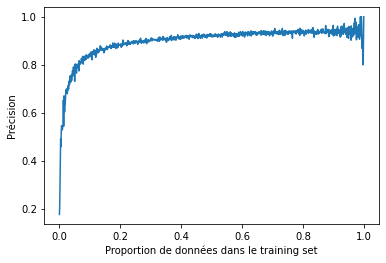

In [8]:
plt.plot([e/1000 for e in range(1,1000)],scores)
plt.ylabel("Précision")
plt.xlabel("Proportion de données dans le training set")
plt.savefig("KNN_prop.png")
plt.show()

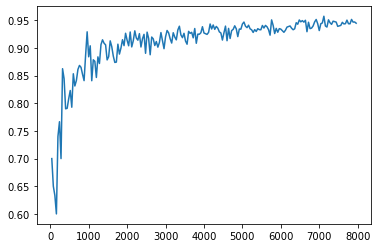

In [10]:
scores = []
for i in range(50,10000,50):
    indexes = np.random.randint(70000, size=i)
    data = mnist.data.values[indexes]
    target = mnist.target[indexes]
    xtrain,  xtest,  ytrain,  ytest = model_selection.train_test_split(data, target, train_size = 0.8)
    clf = neighbors.KNeighborsClassifier (3)
    clf.fit(xtrain, ytrain)
    scores.append(clf.score(xtest,ytest))

plt.plot([e*0.8 for e in range(50,10000,50)],scores)

#Plus la taille du training set est grande, meilleur est le modèle

itération %d eme 1
Score pour p=1 : 0.87
Score pour p=2 : 0.88
Score pour p=3 : 0.88
Score pour p=4 : 0.89
Score pour p=5 : 0.89
Score pour p=6 : 0.88
Score pour p=7 : 0.885
Score pour p=8 : 0.89
Score pour p=9 : 0.89
Score pour p=10 : 0.89
Score pour p=11 : 0.89
Score pour p=12 : 0.88
Score pour p=13 : 0.885
Score pour p=14 : 0.885
Score pour p=15 : 0.885
Score pour p=16 : 0.88
Score pour p=17 : 0.885
Score pour p=18 : 0.89
Score pour p=19 : 0.89
Score pour p=20 : 0.89
Score pour p=21 : 0.89
Score pour p=22 : 0.885
Score pour p=23 : 0.89
Score pour p=24 : 0.89
Score pour p=25 : 0.89
Score pour p=26 : 0.89
Score pour p=27 : 0.89
Score pour p=28 : 0.89
Score pour p=29 : 0.89
itération %d eme 2
Score pour p=1 : 0.905
Score pour p=2 : 0.9125
Score pour p=3 : 0.9125
Score pour p=4 : 0.915
Score pour p=5 : 0.915
Score pour p=6 : 0.9225
Score pour p=7 : 0.92
Score pour p=8 : 0.915
Score pour p=9 : 0.9175
Score pour p=10 : 0.9175
Score pour p=11 : 0.92
Score pour p=12 : 0.9225
Score pour p=13

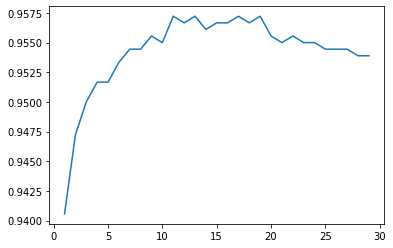

In [11]:
for j in range(1,10):
    print("itération %d eme",j)
    scores = []
    indexes = np.random.randint(70000, size=1000*j)
    data = mnist.data.values[indexes]
    target = mnist.target[indexes]
    xtrain,  xtest,  ytrain,  ytest = model_selection.train_test_split(data, target, train_size = 0.8)

    for i in range(1,30):
        clf = neighbors.KNeighborsClassifier (3, p=i, n_jobs = -1)
        clf.fit(xtrain, ytrain)
        scores.append(clf.score(xtest,ytest))
        print("Score pour p={} : {}".format(i,scores[-1]) )

plt.plot([e for e in range(1,30)],scores)

#La meilleure distance dans ce cas semble être entre p=7 et p = 13. Le temps de calcul est beaucoup plus faible pour p=1 ou 2

In [12]:
indexes = np.random.randint(70000, size=5000)
data = mnist.data.values[indexes]
target = mnist.target[indexes]
xtrain,  xtest,  ytrain,  ytest = model_selection.train_test_split(data, target, train_size = 0.8)

start_time = time.time()
clf = neighbors.KNeighborsClassifier (3, p=7, n_jobs = 1)
clf.fit(xtrain, ytrain)
scores.append(clf.score(xtest,ytest))
end_time = time.time()
print("Temps écoulé pour n_job = 1 : {}".format(end_time - start_time) )

start_time = time.time()
clf = neighbors.KNeighborsClassifier (3, p=7, n_jobs = -1)
clf.fit(xtrain, ytrain)
scores.append(clf.score(xtest,ytest))
end_time = time.time()
print("Temps écoulé pour n_job = -1 : {}".format(end_time - start_time) )

Temps écoulé pour n_job = 1 : 24.635441541671753
Temps écoulé pour n_job = -1 : 3.6439924240112305


In [13]:
#Avantage:
#Pas d'apprentissage, le modèle est obtenu directement

#Inconvénients: 
#Chaque prédiction prend beaucoup de temps, surtout si le nombre de points est grand
#Pas d'apprentissage don on doit garder l'intégralité des points en mémoire